## 3. Sposoby wizualizacji danych

W zależności od typu danych istnieją różne sposoby ich reprezentowania. A jak to ktoś powiedział jeden obraz jest wart tysiąca słów. Popatrzmy na najpopularniejsze sposby przedstawiania różnych typów danych.

### Wizualizacja danych kategorycznych

Zacznijmy od danych kategorycznych. Do najczęstszych sposobów przedstawiania tych danych należą:

A. tabela rozkładu liczebności/częstości (ang. frequency distribution table) \
B. wykres słupkowy (ang. bar chart) \
C. wykres kołowy (ang. pie chart) \
D. diagram Pareto (ang. Pareto diagram)

Weźmy nasze dane i zaprezentujmy je w każdym z powyższych sposobów. Przypomnijmy sobie jak wyglądają.

In [ ]:
# wczytanie danych
import pandas as pd

df = pd.read_csv("mock_data.csv")
df

Wybierzmy jakieś dane kategoryczne. Świetnym kandydatem jest tutaj kolumna `country`.

In [ ]:
# Dane kategoryczne na przykładzie kolumny `country`


#### 1a. Tabela rozkładu liczebności

Tabela rozkładu liczebności to po prostu przedstawienie zliczeń występowania poszczególnych kategorii w postaci tabelarycznej.

In [ ]:
# Tabela rozkładu liczebności


#### 1b. Tabela rozkładu częstości

Tabela rozkładu częstości to znormalizowana tabela rozkładu częstości. Na poszczególnych pozycjach nie jest przedstawiona liczba wystąpień danej kategorii, tylko jaką część wszystkich wartości stanowi konretna kategoria).

In [ ]:
# Tabela rozkładu częśtości


### 2. Wykres słupkowy

Wykres słupkowy to graficzne przedstawienie tabeli rozkładu liczebności

In [ ]:
# Wykres słupkowy dla tabeli liczebności


Trochę gęsto. Może weźmy 20 najczęściej pojawiających się państw i posortujmy je w porządku alfabetycznym.

In [ ]:
# 20 pierwszych pozycji z tabeli liczebności na wykresie słupkowym


A pierwsze 40 państw.

In [ ]:
# 40 pierwszych pozycji z tabeli liczebności na wykresie słupkowym


Powyższy wkres słupkowy przedstawia liczebność poszczególnych kategorii, ale równie dobrze na osi werykalnej możemy odkładać częstości. Czyli zbudować wykres słupkowy na bazie tabeli rozkładu częstości.

In [ ]:
# 20 pierwszych pozycji z tabeli częstości na wykresie słupkowym


Taki wykres (częstości występowania) bardzo przypomina tzw. histogram, o którym powiemy podczas omawiania metod graficznego przedstawiania danych liczbowych.

### 3. Wykres kołowy

Wykres kołowy jest często wykorzystywany kiedy chcemy nie tylko porównać elementy między sobą, ale także zobaczyć ich udział w całości.

In [ ]:
# Tabela częstości, rozkład kołowy


Znów gęsto. Zróbmy pierwsze 10 krajów.

In [ ]:
# 10 pierwszych pozycji z tabeli częstości na wykresie słupkowym


#### 4. Diagram Pareto

Diagram Pareto to nic innego jak specjalny typ wykresu słupkowego, na którym kategorie są przedstawione w porządku malejącym według częstości ich występowania. Dodatkowo na ten wykres słupkowy nanosi się jeszcze krzywą przedstawiającą kumulantę częstości (sumę względnych częstości).

Zróbmy diagram Pareto dla 20 najczęściej występujących krajów. Na potrzeby tego przykładu przyjmijmy, że nasze dane składają się wyłacznie z tych 20 krajów.

In [ ]:
# Dane złożone wyłącznie z 20 najczęściej występujących krajów


Przygotujmy tabele rozkładu liczebności i częstości dla takich danych.

In [ ]:
# Tabela liczebności i częstości dla 20 najczęściej występujących krajów


Wykres słupkowy

In [ ]:
# wykres słupkowy dla tabeli liczebności


Teraz jeszcze kumulanta.

In [ ]:
# Kumulanta dla tabeli częstości


W celu przedsatwienia obu wyreksów na jednym obrazku, trzeba bezpośrednio użyć narzędzi biblioteki `matplotlib`.

In [ ]:
# Naniesienie wykresu słupkowego i kumulanty na jeden obraz
import matplotlib.pyplot as plt


# Tworzymy pierwszy wykres - wykres słupkowy


# Tworzymy drugi wykres - wykres liniowy z inną osią Y


Zauważ, jak wykres Pareto łączy mocne strony wykresów słupkowych i kołowych. Łatwo jest porównać dane zarówno pomiędzy kategoriami, jak i jako część całości. Co więcej, gdyby to był na przykład wykres przedstawiający udziały w rynku, łatwo byłoby zobaczyć udział rynkowy dwóch lub pięciu czołowych firm.

### Wizualizacja danych numerycznych


Do najpopularniejszych sposobów przedstawiania danych liczbowych należą:

A. tabela rozkładu częstości (ang. frequency distribution table) \
B. histogram (ang. histogram) \

Weźmy znów nasze dane

In [ ]:
# dane
df

i tym razem wybierzmy jakieś dane liczbowe. `Balance` jest całkiem niezłym wyborem.

In [ ]:
# Dane liczbowe na przykładzie kolumny `balance`


### Tabela rozkładu częstości

Tu idea jest identyczna jak przy danych kategorycznych. Niestety, podczas jej realizacji natrafiamy na zasadniczy problem.

In [ ]:
# Tabela rozkładu liczebności


Każda z wartości występuje tylko raz, więc ich zliczanie mija się z celem. Co możemy z tym zrobić ?

Zliczanie pojedynczych wartości rzeczywiście mija się z celem. Ale możemy to rozwiązać w trochę inny sposób. Możemy "sztucznie" potworzyć przedziały i zliczać ile wartości wpada do poszczególnych przedziałów. Takie kieszenie i patrzeć ile wartości jest każdej z kieszeni. Spróbujmy zrealizować ten pomysł.

Zobaczmy w jakim zakresie wartości się poruszamy.

In [ ]:
# Minimalna wartość w kolumnie `balance`


In [ ]:
# Maksymalna wartość w kolumnie `balance`


Czyli mamy wartości od 615 do 999 612. Zaokrąglmy to do przedziału 0-100000.

Teraz utwórzmy dla tego przedziału 10 równych podprzedziałów, takich koszyków: 0-100000, 100000-200000, ..., 900000-1000000.

In [ ]:
# zakre podzielony na 10 przedziałów


Teraz należałoby dla poszczególnych przedziałów zliczyć ile wartości w nich występuje. Można byłoby to zrobić za pomocą pętli. Ale biblioteka `matplotlib` (oraz wiele innych) dysponuje funkcją która to zrobi za nas, i nawet potem wynik ładnie naniesie na wykres. Wystarczy podać jej w parametrze bins granice przedziałów zliczeń.

In [ ]:
# zliczenia w poszczególnych przedziałach


In [ ]:
# zliczenia


In [ ]:
# granice przedziałów


Na podstawie tych dwóch wartości możemy stworzyć tablicę rozkładu liczebności.

In [ ]:
# Tabela liczebości na podstawie zliczeń w przedziałach


### Histogram

I nawet naniesie na wykres?

In [ ]:
# Histogram, funkcja `hist`


A w bibliotece `pandas` ramki danych mają metodę hist, która pod spodem wywołuje funkcję hist bibliioteki `matplotlib`.

In [ ]:
# Histogram, metoda `hist`


Nawet nie trzeba podawać przedziałów. Jeżeli tego nie zrobimy metoda hist przyjmie domyślną liczbę przedziałów równą właśnie 10.

In [ ]:
# Histogram, metoda `hist`, domyślna liczba przedziałów


Jeżeli jako wartość parametru `bins` zamiast listy wstawimy liczbę, to funkcja utworzy wskazaną liczbę równych przedziałów. Spróbujmy z 25 przedziałami. 

In [ ]:
# Histogram, metoda `hist`, 25 przedziałów


Za pomocą paramteru `edgecolor` możemy zaznaczyć granicę każdego przedziału.

In [ ]:
# Histogram, krawędzie


A parametr `alpha` pozwala wprowadzić warstwę przeźroczystości na słupki.

In [ ]:
# Histogram, przeźroczystość


In [ ]:
# Histogram, bez siatki


Zamiast metody `hist` możemy też użyć metody `plot` z parametrem `kind` o wartości 'hist' uzyskując identyczny efekt.

In [ ]:
# Histogram, metoda `plot`


In [ ]:
# Histogram, metoda `plot`


Taki wykres ze zliczeniami w przyjętych przedziałach nazywamy właśnie **histogramem**.

Wygląda jak wykres słupkowy, ale w rzeczywistości przekazuje zupełnie inne informacje. Tak jak w wykresie słupkowym, oś pionowa ma charakter liczbowy i pokazuje częstość bezwzględną. Tym razem jednak oś pozioma także jest osią liczbową. Każdy słupek ma szerokość równą przedziałowi, a wysokość równą częstości.

Zwróć uwagę jak następujące po sobie słupki się stykają. To daletego, aby pokazać, że między przedziałami istnieje ciągłość – każdy przedział kończy się tam, gdzie zaczyna się kolejny. W wykresie słupkowym różne słupki reprezentowały różne kategorie i były one całkowicie od siebie oddzielone.

Możemy stworzyć histogram z nierównymi przedziałami. Przykładem może być projektowanie grup wiekowych. Prawdopodobnie wypełniałeś ankietę, w której pytano o Twój wiek, a możliwe odpowiedzi to: 18-25, 26-30, 31-35, ..., 60+. Wyraźnie widać, że szerokości przedziałów różnią się i odzwierciedlają różne grupy docelowe dla przeprowadzanego eksperymentu. Wyjaśnienie dla tego wyboru może brzmieć: młodsze osoby poniżej 25. roku życia nie stać na dany produkt, podczas gdy osoby powyżej 60. roku życia nie są zainteresowane produktem.

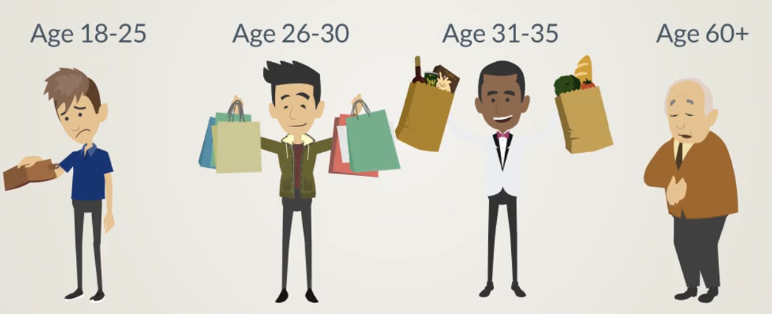

Wprowadźmy takie przedziały u nas i zobaczmy jak będzie wyglądał histogram.

In [ ]:
# Histogram, grupy wiekowe


Histogram, często przedstawia się też w postaci znormalizowanej, gdzie całkowite pole histogramu wynosi 1, a pola poszczególnych słupków są proporcjonalne do częstości występowania wartości w zadanym przedziale. W metodzie `hist` służy do tego parametr `density`, którego wartość domyślna to `False`.

In [ ]:
# Histogram, grupy wiekowe, pole słupku proporcjonalne do częstości wystąpień


Innym, często spotykanym rodzajem wykresu danych liczbowych jest tzw. wykre pudełkowy, który został omówiony w dodatku.

### Sposoby reprezentowania zależności pomiędzy dwoma zmiennymi

Do tej pory przedstawialiśmy sposoby wizualizacji jednej zmiennej. A w jaki sposób możemy wizualizować zależności pomiędzy dwoma zmiennymi ?

I znów to zależy od typu danych. Omówimy po jednej metodzie na każdy typ:
- tabela krzyżowa (**ang. cross table**) dla zmiennych kategorycznych
- wykres punktowy (**ang. scatter plot**) dla zmiennych numerycznych

#### Tabela krzyżowa

Tabela krzyżowa aka tabel kontyngencji (ang. cross table aka contingency table) to tabelaryczny sposób przedstawienia zależności (lub jej braku) pomiędzy dwoma zmiennymi kategorycznymi. Jej celem jest przedstawienie czy poszczególne wartości obu badanych zmiennych wykazują tendencje do częstszego występowania razem.

**Use case**

Wyobraźmy sobie, że przeprowadziliśmy badanie w dużym biurze z siedzibą w trzech miastach: Warszawie, Krakowie i Gdańsku. Celem badania było sprawdzenie, jaki wpływ (i czy w ogóle) ma lokalizacja biura na preferowany tryb pracy: stacjonarny, hybrydowy lub całkowicie zdalny. Chcemy dowiedzieć się, czy istnieje jakaś zależności pomiędzy siedzibą biura, a preferencjami trybu pracy pracowników tego biura.

Wyniki przeprowadzonej ankiety zostały zapisane w pliku `work_mode.csv`.

In [ ]:
# Dane, ankieta z biura


Utwórzmy na podstawie danych tablicę krzyżową.

In [ ]:
# Utworzenie tabeli krzyżowej


Na bazie tabeli krzyżowej łatwo jest wygenerować wykres słupkowy typu side-by-side.

In [ ]:
# wykres słupkowy na podstawie tabeli krzyżowej


Jakie wnioski możemy wyciągnąć na podstawie tabeli?

Gdańszczanie preferują tryb stacjonarny, Krakowianie hybrydowy, a Warszawaicy zdalny. Na podstawie tabeli krzyżowej widać, że istnieje zależność pomiędzy lokalizacją biura, a preferencjami pracowników. Nie wiemy, czy ta zależność jest bezpośrednia, czy wynika z jakiś pośrednich czynników. Może to na przykład nie być wcale kwestia biura, tylko przełożonych w tych biurach. Taki luźny związek pomiędzy zmiennymi nazywamy w statystyce **korelacją**. Korelacja nie oznacza jeszcze, że dane zależą od siebie w bezpośredni sposób, ale oznacza że jakieś powiązanie (być może nie bezpośrednie) istnieje. W języku angielskim na tę regułę istnieje popularne sentencja:

**Correlation is not causation**

Korelacja nie oznacza przyczynowości. Innymi słowami to, że udało nam się znaleźć jakąś korelacje nie oznacza, że ludzie pracujący w gdańskim biurze preferują tryb stacjonarny z powodu samego biura i jeżeli teraz identyczne biuro wybudujemy w Warszawie, to warszawscy pracownicy zaczną mieć identyczne preferencje co gdańscy. Innym przykładem tej reguły jest znalezienie korelacji pomiędzy ceną pitego wina, a długością życia osób badanych. I tym sposobem możemy płynnie przejść do danych numerycznych.

#### Wykres punktowy

Wykres punktowy (ang. scatter plot) jest często wykorzystywane do graficznego przedstawienia korelacji pomiędzy dwoma zmiennymi. Na jednej osi odkładamy wartości jednej zmiennej, na drugiej osi wartości drugiej zmiennej. Jeżeli w danych widzimy jakąś **tendencje** oznacza to, że dane są ze sobą skorelowane. 

**Use case**

Przedstawmy dane pochodzące z interesującego badania przeprowadzonego w grupie miłośników wina. Celem było zbadanie, czy istnieje powiązanie między średnią ceną wypijanego wina a długością życia. Wydawałoby się, że ten luksusowy trunek mógłby mieć wpływ na jakość życia — pytanie brzmi, czy również na jego długość?

W ankiecie zapytano o wiek ankietowanych oraz o średnią cenę butelki wina, którą regularnie wybierają. Wyniki ankeity zawierają informacje o:
- Wiek (w latach),
- Średnia cena butelki wina (w USD)

i zostały zapisane w pliku `wine.csv`. Twoim zadaniem jest wyświetlenie danych oraz wizualne oszacowanie, czy istnieje pomiędzy tymi dwoma zmiennymi jakakolwiek korelacja.

In [ ]:
# Dane, cena wina vs wiek


In [ ]:
# Wykres punktowy


Patrząc na otrzymany wykres widzimy wyraźną korelację (pozytywną korelację). Wraz ze wzrostem ceny wina, długość życia również się zwiększa. Im droższe wino piła osoba, tym dłużej żyła.

Ale, czy ta korelacja oznacza przyczynowość. Czy znaleźliśmy właśnie sposób na długowieczność?

Nie!

Może są inne czynniki, które mają wpływ na długość życia, a są powiązane z ceną kupowanego wina. Tutaj naturalnym kandydatem jest stan zamożności. Im ktoś jest bogatszy tym bardziej może pozwolić sobie na zdrowsze jedzenie, lepszą opiekę medyczną, ... i droższe wino oczywiście też. Szukanie przyczynowości w tym miejscu wydaje się być bardziej zasadne. Podobnie z biurami i trybem pracy. Być może Gdańszczanie mają biuro przy samej plaży, a Warszawiacy korki.

Na wykresie możemy odczytać więcej informacji, widzimy sporo przypadków osób, które piły tanie wino i żyły krótko oraz osób, które piły drogie wino i żyły długo, ale są też i odstępstaw. Widzimy osoby, które pomimo, że piły stosunkowo drogie wino, żyły stosunkowo krótko i osoby, które piły stosunkowo tanie wino, a żyły stosunkowo długo. To są tzw. **outliery**.

Oczywiście, istnieją również ilościowe miary korelacji, ale w tej części skupiliśmy się na jakościowym porównywaniu. Nadszedł czas, żeby przejść do miar ilościowych.